# Aula 6 - Segmenta√ß√£o

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Ler a base
df = pd.read_csv('../bases/clientes.csv')
print("[INFO] Dimens√µes:", df.shape)
print("[INFO] Colunas:", list(df.columns))
print(df.info())
print("#"*120)
print("")
print(df.describe())

[INFO] Dimens√µes: (500, 10)
[INFO] Colunas: ['Idade', 'G√™nero', 'EstadoCivil', 'Escolaridade', 'RendaMensal', 'TempoNoSite(min)', 'VisitasMensais', 'ValorMedioCompra', 'CategoriaFavorita', 'Dispositivo']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              500 non-null    int64  
 1   G√™nero             500 non-null    object 
 2   EstadoCivil        500 non-null    object 
 3   Escolaridade       500 non-null    object 
 4   RendaMensal        500 non-null    object 
 5   TempoNoSite(min)   500 non-null    float64
 6   VisitasMensais     500 non-null    int64  
 7   ValorMedioCompra   500 non-null    int64  
 8   CategoriaFavorita  500 non-null    object 
 9   Dispositivo        500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 39.2+ KB
None
############################################

In [46]:
df

Idade     G√™nero EstadoCivil   Escolaridade      RendaMensal  \
0       56   Feminino      Casado  P√≥s-gradua√ß√£o       5 a 10 mil   
1       69   Feminino  Divorciado          M√©dio        2 a 5 mil   
2       46   Feminino    Solteiro          M√©dio        At√© 2 mil   
3       32   Feminino    Solteiro       Superior  Acima de 20 mil   
4       60  Masculino      Casado       Superior       5 a 10 mil   
..     ...        ...         ...            ...              ...   
495     65  Masculino    Solteiro          M√©dio        2 a 5 mil   
496     42   Feminino    Solteiro          M√©dio      10 a 20 mil   
497     57  Masculino    Solteiro    Fundamental       5 a 10 mil   
498     62  Masculino  Divorciado       Superior       5 a 10 mil   
499     18  Masculino    Solteiro       Superior        2 a 5 mil   

     TempoNoSite(min)  VisitasMensais  ValorMedioCompra CategoriaFavorita  \
0                8.68               5               100         Alimentos   
1               15.51               4               200       Eletr√¥nicos   
2                8.61               5              1000       Eletr√¥nicos   
3                0.01               8               200              Casa   
4                5.06               4               300         Alimentos   
..                ...             ...               ...               ...   
495              2.21               4               100            Livros   
496             13.03               7                50              Moda   
497              1.30               1                50          Esportes   
498              5.03               7              1000       Eletr√¥nicos   
499              1.26               3               100              Moda   

    Dispositivo  
0        Mobile  
1        Mobile  
2        Tablet  
3       Desktop  
4        Mobile  
..          ...  
495      Mobile  
496     Desktop  
497     Desktop  
498     Desktop  
499      Mobile  

[500 rows x 10 columns]


## Padr√£o b√°sico da API do scikit-learn

- fit(X, y=None): ajusta o estimador aos dados (aprende par√¢metros).
- transform(X): transforma X com base no que foi aprendido no fit.
- fit_transform(X): faz fit + transform de uma vez (muito comum em pr√©-processamento).
- predict(X): gera previs√µes/labels ap√≥s o modelo estar ajustado.
- fit_predict(X): ajusta e j√° retorna os r√≥tulos (muito usado em clustering).

#### Exemplo ilustrativo (N√ÉO executado aqui):
```python
scaler = StandardScaler()               # o algoritmo
X_scaled = scaler.fit_transform(X)      # ajusta e transforma
pca = PCA(n_components=2)               # o algoritmo
X_pca = pca.fit_transform(X_scaled)     # ajusta e projeta
km = KMeans(n_clusters=4, n_init=10, random_state=42) # o algoritmo
labels = km.fit_predict(X_pca)          # ajusta e retorna r√≥tulos
```

## Pr√©-processamento

Para fazermos a segmenta√ß√£o, √© importante fazermos o pr√©-processamento dos dados. Um dos principais pr√©-processamentos √© a padroniza√ß√£o, que nada mais √© que colocar todos os dados em uma mesma **escala**. Contudo, s√≥ deve ser feito em vari√°veis **num√©ricas**. Vamos separar os dois casos (num√©ricos e categ√≥ricos) com o m√©todo `select_dtypes()`.

In [9]:
numericas = df.select_dtypes(include='number').columns.tolist()    # Aqui, incluimos apenas os n√∫meros
categoricas = df.select_dtypes(exclude='number').columns.tolist()  # Aqui, excluimos os n√∫meros, mantendo apenas as categ√≥ricas.

print(f'[INFO] Num√©ricas: {numericas}')
print(f'[INFO] Categ√≥ricas: {categoricas}')

[INFO] Num√©ricas: ['Idade', 'TempoNoSite(min)', 'VisitasMensais', 'ValorMedioCompra']
[INFO] Categ√≥ricas: ['G√™nero', 'EstadoCivil', 'Escolaridade', 'RendaMensal', 'CategoriaFavorita', 'Dispositivo']


### Padroniza√ß√£o

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numericas])  # Aten√ß√£o: aqui fizemos s√≥ com as num√©ricas e aplicamos o fit_transform!

print("Antes:")
print(df[numericas].head())
print("#"*120)
print("Depois:")
print(pd.DataFrame(df_scaled[:5], columns=numericas))

Antes:
   Idade  TempoNoSite(min)  VisitasMensais  ValorMedioCompra
0     56              8.68               5               100
1     69             15.51               4               200
2     46              8.61               5              1000
3     32              0.01               8               200
4     60              5.06               4               300
########################################################################################################################
Depois:
      Idade  TempoNoSite(min)  VisitasMensais  ValorMedioCompra
0  0.784233          0.741806       -0.003626         -0.578486
1  1.649686          2.112274       -0.456865         -0.122626
2  0.118500          0.727760       -0.003626          3.524249
3 -0.813526         -0.997865        1.356092         -0.122626
4  1.050527          0.015438       -0.456865          0.333233


### OneHotEncoder

Quando temos vari√°veis categ√≥rias, n√£o existe padroniza√ß√£o poss√≠vel. O processamento que fazemos, em geral, √© transformar todas as vari√°veis em *OnehotEncoding*, ou seja, se temos uma coluna de G√™nero com as respostas Masculino e Feminino, o OneHotEncoding transforma em duas colunas, Masculino e Feminino, onde os valores s√£o 0 ou 1. Isso facilita o trabalho dos algoritmos e torna nossos modelos melhores.

In [13]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_ohe = ohe.fit_transform(df[categoricas])
print("Antes:")
print(df[categoricas].head())
print("Depois:")
pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out()).head()

Antes:
      G√™nero EstadoCivil   Escolaridade      RendaMensal CategoriaFavorita  \
0   Feminino      Casado  P√≥s-gradua√ß√£o       5 a 10 mil         Alimentos   
1   Feminino  Divorciado          M√©dio        2 a 5 mil       Eletr√¥nicos   
2   Feminino    Solteiro          M√©dio        At√© 2 mil       Eletr√¥nicos   
3   Feminino    Solteiro       Superior  Acima de 20 mil              Casa   
4  Masculino      Casado       Superior       5 a 10 mil         Alimentos   

  Dispositivo  
0      Mobile  
1      Mobile  
2      Tablet  
3     Desktop  
4      Mobile  
Depois:


G√™nero_Feminino  G√™nero_Masculino  G√™nero_Outro  EstadoCivil_Casado  \
0              1.0               0.0           0.0                 1.0   
1              1.0               0.0           0.0                 0.0   
2              1.0               0.0           0.0                 0.0   
3              1.0               0.0           0.0                 0.0   
4              0.0               1.0           0.0                 1.0   

   EstadoCivil_Divorciado  EstadoCivil_Solteiro  EstadoCivil_Vi√∫vo  \
0                     0.0                   0.0                0.0   
1                     1.0                   0.0                0.0   
2                     0.0                   1.0                0.0   
3                     0.0                   1.0                0.0   
4                     0.0                   0.0                0.0   

   Escolaridade_Fundamental  Escolaridade_M√©dio  Escolaridade_P√≥s-gradua√ß√£o  \
0                       0.0                 0.0                         1.0   
1                       0.0                 1.0                         0.0   
2                       0.0                 1.0                         0.0   
3                       0.0                 0.0                         0.0   
4                       0.0                 0.0                         0.0   

   ...  RendaMensal_At√© 2 mil  CategoriaFavorita_Alimentos  \
0  ...                    0.0                          1.0   
1  ...                    0.0                          0.0   
2  ...                    1.0                          0.0   
3  ...                    0.0                          0.0   
4  ...                    0.0                          1.0   

   CategoriaFavorita_Casa  CategoriaFavorita_Eletr√¥nicos  \
0                     0.0                            0.0   
1                     0.0                            1.0   
2                     0.0                            1.0   
3                     1.0                            0.0   
4                     0.0                            0.0   

   CategoriaFavorita_Esportes  CategoriaFavorita_Livros  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   CategoriaFavorita_Moda  Dispositivo_Desktop  Dispositivo_Mobile  \
0                     0.0                  0.0                 1.0   
1                     0.0                  0.0                 1.0   
2                     0.0                  0.0                 0.0   
3                     0.0                  1.0                 0.0   
4                     0.0                  0.0                 1.0   

   Dispositivo_Tablet  
0                 0.0  
1                 0.0  
2                 1.0  
3                 0.0  
4                 0.0  

[5 rows x 25 columns]

## Juntando tudo

Agora precisamos concatenar as duas tabelas. Para isso, usamos a fun√ß√£o `hstack`(horizontal stack, empilhando horizontal) do numpy. Percebam como as bases deixam de ser dataframes e viram vetores/matrizes.

In [14]:
X_processed = np.hstack((df_scaled, df_ohe))
print(X_processed)

[[ 0.78423339  0.74180622 -0.00362591 ...  0.          1.
   0.        ]
 [ 1.6496862   2.11227381 -0.45686522 ...  0.          1.
   0.        ]
 [ 0.11850046  0.72776043 -0.00362591 ...  0.          0.
   1.        ]
 ...
 [ 0.85080668 -0.73902114 -1.81658316 ...  1.          0.
   0.        ]
 [ 1.18367315  0.0094187   0.90285271 ...  1.          0.
   0.        ]
 [-1.74555174 -0.7470473  -0.91010454 ...  0.          1.
   0.        ]]


## PCA - Redu√ß√£o de Dimensionalidade

O PCA √© uma t√©cnica estat√≠stica utilizada para reduzir a dimensionalidade dos dados sem perder as informa√ß√µes mais relevantes. Quando lidamos com muitas vari√°veis ao mesmo tempo (como idade, renda, tempo de navega√ß√£o, frequ√™ncia de compra etc.), √© comum que algumas delas estejam correlacionadas e contenham informa√ß√µes repetidas. O PCA busca **identificar novas vari√°veis** ‚Äî chamadas de componentes principais ‚Äî que s√£o **combina√ß√µes lineares** das vari√°veis originais. Esses componentes s√£o constru√≠dos de forma a capturar a maior quantidade poss√≠vel da vari√¢ncia dos dados. **Na pr√°tica, isso significa que podemos resumir um conjunto complexo de vari√°veis em poucas dimens√µes**, mantendo a ess√™ncia das diferen√ßas entre os indiv√≠duos. Por exemplo, em vez de analisar 10 vari√°veis separadamente, √© poss√≠vel projetar os dados em 2 ou 3 componentes principais e ainda assim visualizar padr√µes, rela√ß√µes e agrupamentos de forma clara e simplificada.

In [37]:
pca = PCA(n_components=2, random_state=93)      # Aqui devemos definir para quantas dimens√µes queremos reduzir
X_pca = pca.fit_transform(X_processed)
print("[INFO] PCA -> n√∫mero de componentes:", pca.n_components)
print("[INFO] Vari√¢ncia explicada (% por componente):", (pca.explained_variance_ratio_ * 100).round(3))
print("[INFO] Vari√¢ncia explicada acumulada (%):", round(pca.explained_variance_ratio_.sum() * 100, 3))

[INFO] PCA -> n√∫mero de componentes: 2
[INFO] Vari√¢ncia explicada (% por componente): [14.074 12.79 ]
[INFO] Vari√¢ncia explicada acumulada (%): 26.864


In [38]:
X_pca[:5]

array([[-0.297612  ,  0.26106676],
       [ 0.43000701,  0.49323561],
       [ 2.34182967,  1.01697315],
       [-0.27243463,  0.84827506],
       [-0.47516946, -0.00579696]])

## K-Means

O K-Means √© um dos algoritmos mais conhecidos para agrupamento n√£o supervisionado. Seu objetivo √© **dividir um conjunto de observa√ß√µes em k grupos (clusters) de modo que os elementos dentro de um mesmo grupo sejam mais parecidos entre si do que em rela√ß√£o aos elementos de outros grupos** (lembrando muito o kNN). O processo funciona de forma iterativa: primeiro, escolhem-se aleatoriamente k pontos iniciais (centroides). Em seguida, cada observa√ß√£o √© atribu√≠da ao centroide mais pr√≥ximo, formando grupos tempor√°rios. Os centroides s√£o ent√£o recalculados com base na m√©dia das observa√ß√µes em cada grupo, e o processo se repete at√© que n√£o haja mais mudan√ßas significativas. O resultado final √© uma parti√ß√£o dos dados que revela padr√µes de similaridade latentes. Essa t√©cnica √© especialmente √∫til em marketing.

Mas como escolher o n√∫mero ideal de grupos? Existe uma m√©trica chamada **Silhouette Score**. O Silhouette Score √© uma m√©trica que avalia a qualidade de um agrupamento. Quando usamos algoritmos como o K-Means, precisamos decidir o n√∫mero de grupos (k) mais adequado. O Silhouette ajuda justamente nessa escolha, medindo o qu√£o bem cada ponto est√° posicionado em rela√ß√£o ao seu pr√≥prio cluster e aos demais. O c√°lculo considera dois fatores: (1) a cohes√£o, ou seja, o qu√£o pr√≥ximo um ponto est√° dos elementos do seu pr√≥prio grupo; e (2) a separa√ß√£o, isto √©, o qu√£o distante ele est√° dos elementos de outros grupos.

O resultado √© um valor que varia entre -1 e 1. Valores pr√≥ximos de 1 indicam que os pontos est√£o bem agrupados dentro de seus clusters e distantes dos demais (ou seja, os grupos est√£o bem definidos). Valores pr√≥ximos de 0 sugerem sobreposi√ß√£o entre clusters, indicando que a separa√ß√£o n√£o √© clara. J√° valores negativos indicam que muitos pontos podem ter sido atribu√≠dos ao grupo ‚Äúerrado‚Äù. Na pr√°tica, o Silhouette Score permite comparar diferentes segmenta√ß√µes (por exemplo, k=2, k=3, k=4) e escolher aquela que apresenta a melhor combina√ß√£o entre coes√£o interna e separa√ß√£o externa, garantindo uma segmenta√ß√£o mais robusta e interpret√°vel.

Executaremos, com um `for`, v√°rios k's poss√≠veis, guardaremos o valor e a√≠ veremos qual o maior, para ent√£o utiliz√°-lo definitivamente.

In [39]:
scores = {}
for k in range(2, 21): # Vou fazer at√© 20 K (21 - 1)
  km_tmp = KMeans(n_clusters=k, n_init=10, random_state=42)
  labels_tmp = km_tmp.fit_predict(X_pca)
  score_tmp = silhouette_score(X_pca, labels_tmp)
  scores[k] = score_tmp

print("[INFO] Silhouette por K (2..20):")
for k, score in scores.items():
  print(f"K={k}: {score:.4f}")

[INFO] Silhouette por K (2..20):
K=2: 0.3793
K=3: 0.3755
K=4: 0.3231
K=5: 0.3514
K=6: 0.3732
K=7: 0.3472
K=8: 0.3506
K=9: 0.3541
K=10: 0.3537
K=11: 0.3524
K=12: 0.3461
K=13: 0.3404
K=14: 0.3487
K=15: 0.3483
K=16: 0.3439
K=17: 0.3441
K=18: 0.3476
K=19: 0.3378
K=20: 0.3506


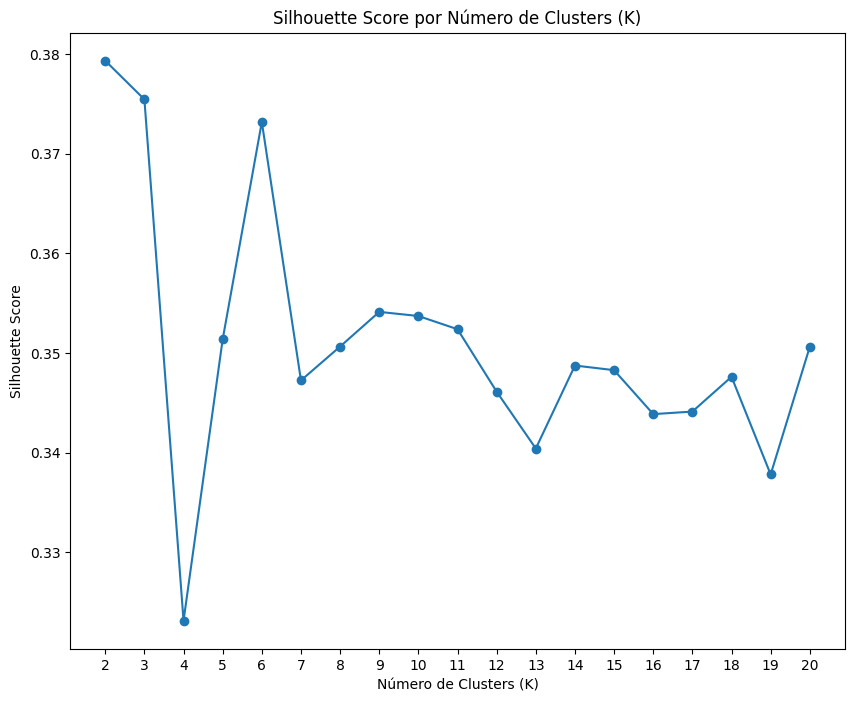

In [40]:
# Plota o silhouette score
plt.figure(figsize=(10, 8))
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(list(scores.keys()))
plt.title('Silhouette Score por N√∫mero de Clusters (K)')
plt.show()

In [41]:
best_k = max(scores, key=scores.get) + 4 # O melhor, nos dados fakes, foi o 2, mas eu quis colocar o 6 para termos variabilidade, por isso somei 4.k
print("[INFO] Melhor K:", best_k)

[INFO] Melhor K: 6


Agora rodamos com o `best_k`

In [42]:
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)
df_clusters = df.copy()
df_clusters['Cluster'] = labels
print("[INFO] Tabela com r√≥tulos:")
df_clusters.head()

[INFO] Tabela com r√≥tulos:


Idade     G√™nero EstadoCivil   Escolaridade      RendaMensal  \
0     56   Feminino      Casado  P√≥s-gradua√ß√£o       5 a 10 mil   
1     69   Feminino  Divorciado          M√©dio        2 a 5 mil   
2     46   Feminino    Solteiro          M√©dio        At√© 2 mil   
3     32   Feminino    Solteiro       Superior  Acima de 20 mil   
4     60  Masculino      Casado       Superior       5 a 10 mil   

   TempoNoSite(min)  VisitasMensais  ValorMedioCompra CategoriaFavorita  \
0              8.68               5               100         Alimentos   
1             15.51               4               200       Eletr√¥nicos   
2              8.61               5              1000       Eletr√¥nicos   
3              0.01               8               200              Casa   
4              5.06               4               300         Alimentos   

  Dispositivo  Cluster  
0      Mobile        4  
1      Mobile        4  
2      Tablet        1  
3     Desktop        4  
4      Mobile        2

### Entendendo cada cluster

Para entender cada segmento/cluster, podemos extrair m√©tricas de cada um deles. Para as vari√°veis num√©ricas, podemos extrair m√©dia/mediana. Para as categ√≥ricas, podemos entender a % de cada categoria interna.

In [43]:
print("\n[M√©dias num√©ricas por cluster]")
print(df_clusters.groupby("Cluster")[numericas].mean().round(2)) # Aqui tiramos a m√©dia e usamos .round(2) para arredondar a 2 casas decimais.

for c in categoricas:
  print(f"\n[Distribui√ß√£o de '{c}' por cluster' (%)]")
  dist = (
      df_clusters.groupby("Cluster")[c]
      .value_counts(normalize=True) # Tiramos a propor√ß√£o de cada
      .rename("pct")                # Renomeamos pra pct
      .mul(100)                     # Multiplicamos por 100
      .round(1)                     # arredondamos pra 1 casa decimal
      .unstack(fill_value=0)        # Fazemos um pivot (deitamos a tabela)
  )
  print(dist)
  print() # s√≥ pra pular linha


[M√©dias num√©ricas por cluster]
         Idade  TempoNoSite(min)  VisitasMensais  ValorMedioCompra
Cluster                                                           
0        37.41              3.31            2.88            147.15
1        38.29             12.72            6.40            580.95
2        56.92              2.25            4.73            131.19
3        27.81             10.01            3.67            365.48
4        41.69              5.78            5.55            226.27
5        54.68              3.07            8.42            221.21

[Distribui√ß√£o de 'G√™nero' por cluster' (%)]
G√™nero   Feminino  Masculino  Outro
Cluster                            
0            44.7       54.5    0.8
1            52.4       40.5    7.1
2            45.9       48.6    5.5
3            26.2       61.9   11.9
4            50.0       45.8    4.2
5            62.1       34.8    3.0


[Distribui√ß√£o de 'EstadoCivil' por cluster' (%)]
EstadoCivil  Casado  Divorciado  Solteir

## Visualizando os clusters

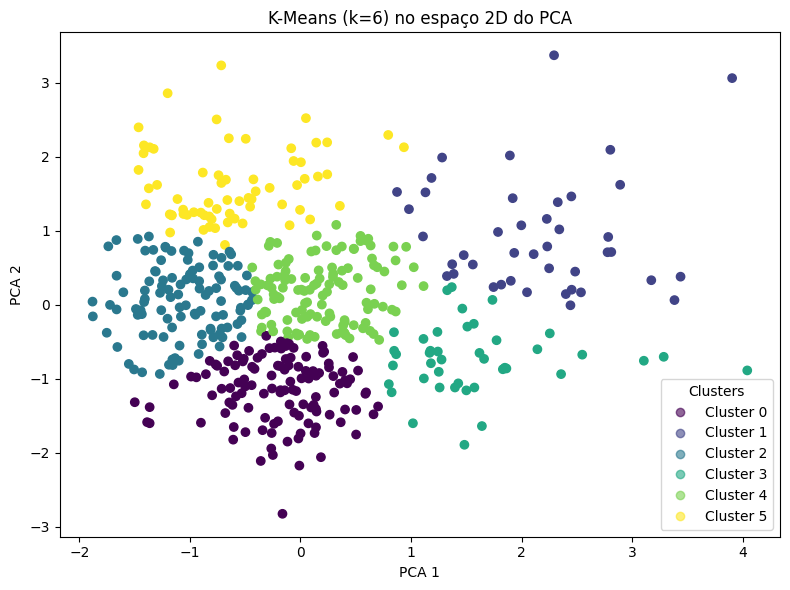

In [44]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"K-Means (k={best_k}) no espa√ßo 2D do PCA")
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
plt.legend(handles, [f"Cluster {i}" for i in range(best_k)], title="Clusters", loc="best")
plt.tight_layout()

# Agora, a IA...

> Prompt: Voc√™ √© um analista de marketing s√™nior. Considerando os seguintes dados, construa personas para cada cluster, que tenham rela√ß√£o com as m√©tricas entregues. Ao final, crie um resumo estrat√©gico.

> Resposta:

üìå Cluster 0 ‚Äì Consumidores Racionais de M√©dia Renda

	‚Ä¢	Idade m√©dia: 37 anos
	‚Ä¢	G√™nero predominante: ligeira maioria masculina (54,5%)
	‚Ä¢	Estado civil: quase metade casados (45,5%), mas muitos solteiros (37,4%)
	‚Ä¢	Renda: concentrada entre 2 a 5 mil (34,1%) e at√© 2 mil (25,2%)
	‚Ä¢	Escolaridade: equilibrada, mas com destaque para ensino superior (35,8%)
	‚Ä¢	Comportamento digital: acessam pouco o site (3,3 min), ~3 visitas/m√™s
	‚Ä¢	Compra m√©dia: R$ 147,15
	‚Ä¢	Categoria favorita: Moda (29,3%) e Eletr√¥nicos (21,1%)
	‚Ä¢	Dispositivo: majoritariamente mobile (47,2%)

üëâ Persona: ‚ÄúAndr√©, 37 anos, analista de escrit√≥rio. Compra online quando precisa, principalmente roupas e eletr√¥nicos. Busca pre√ßo acess√≠vel, faz compras r√°pidas pelo celular, n√£o explora muito o site. Prefere praticidade a experi√™ncias longas de navega√ß√£o.‚Äù

‚∏ª

üìå Cluster 1 ‚Äì Premium Exploradores Digitais

	‚Ä¢	Idade m√©dia: 38 anos
	‚Ä¢	G√™nero predominante: feminino (52,4%), presen√ßa de pessoas que se identificam como ‚Äúoutro‚Äù (7,1%)
	‚Ä¢	Estado civil: casados (47,6%), mas forte presen√ßa de solteiros (33,3%)
	‚Ä¢	Renda: faixa mais baixa at√© 2 mil √© expressiva (35,7%), mas tamb√©m aparecem em 10 a 20 mil (19%)
	‚Ä¢	Escolaridade: ensino m√©dio (40,5%) e superior (33,3%)
	‚Ä¢	Comportamento digital: passam bastante tempo no site (12,7 min), 6,4 visitas/m√™s
	‚Ä¢	Compra m√©dia: muito elevada ‚Äì R$ 580,95
	‚Ä¢	Categoria favorita: Eletr√¥nicos (23,8%), Livros (16,7%) e Alimentos (19%)
	‚Ä¢	Dispositivo: forte uso de desktop (59,5%)

üëâ Persona: ‚ÄúFernanda, 38 anos, profissional liberal. Explora detalhadamente o site, gosta de comparar e avaliar produtos antes de comprar. Valoriza eletr√¥nicos de ponta e experi√™ncias digitais mais ricas. Apesar da renda diversificada no cluster, √© quem mais gasta individualmente, demonstrando disposi√ß√£o para investir em compras maiores.‚Äù

‚∏ª

üìå Cluster 2 ‚Äì Tradicionalistas de Baixa Frequ√™ncia

	‚Ä¢	Idade m√©dia: 57 anos
	‚Ä¢	G√™nero: equil√≠brio entre masculino (48,6%) e feminino (45,9%)
	‚Ä¢	Estado civil: maioria casados (42,2%) e solteiros (41,3%)
	‚Ä¢	Renda: prevalece 2 a 5 mil (37,6%), seguido por 5 a 10 mil (26,6%)
	‚Ä¢	Escolaridade: ensino superior (38,5%) e m√©dio (35,8%)
	‚Ä¢	Comportamento digital: baix√≠ssimo tempo de navega√ß√£o (2,2 min), mas ~5 visitas/m√™s
	‚Ä¢	Compra m√©dia: baixa ‚Äì R$ 131,19
	‚Ä¢	Categoria favorita: Moda (25,7%) e Casa (15,6%)
	‚Ä¢	Dispositivo: preferem mobile (57,8%)

üëâ Persona: ‚ÄúJos√©, 56 anos, servidor p√∫blico prestes a se aposentar. Usa o site de forma pr√°tica e direta, faz compras simples (roupas, itens para casa), sem gastar muito tempo navegando. Valoriza funcionalidade e confian√ßa da marca.‚Äù

‚∏ª

üìå Cluster 3 ‚Äì Jovens Aspiracionais

	‚Ä¢	Idade m√©dia: 28 anos
	‚Ä¢	G√™nero: predomin√¢ncia masculina (61,9%) e presen√ßa significativa de ‚Äúoutro‚Äù (11,9%)
	‚Ä¢	Estado civil: mais solteiros (40,5%) e menor taxa de casados (33,3%)
	‚Ä¢	Renda: distribu√≠da entre at√© 2 mil (28,6%), 2 a 5 mil (23,8%) e 5 a 10 mil (23,8%)
	‚Ä¢	Escolaridade: ensino m√©dio (38,1%), mas tamb√©m destaque para p√≥s-gradua√ß√£o (21,4%)
	‚Ä¢	Comportamento digital: alta perman√™ncia no site (10 min), ~3,7 visitas/m√™s
	‚Ä¢	Compra m√©dia: R$ 365,48
	‚Ä¢	Categoria favorita: Moda (26,2%) e Eletr√¥nicos (23,8%)
	‚Ä¢	Dispositivo: equilibrado entre desktop (45,2%) e mobile (42,9%)

üëâ Persona: ‚ÄúLucas, 27 anos, estudante de p√≥s-gradua√ß√£o. Busca se afirmar socialmente com moda e tecnologia, navega bastante no site antes de comprar. Apesar da renda ainda limitada, est√° disposto a gastar relativamente mais em itens que considera relevantes para seu estilo de vida.‚Äù

‚∏ª

üìå Cluster 4 ‚Äì Consumidores Pragm√°ticos de Renda M√©dia

	‚Ä¢	Idade m√©dia: 42 anos
	‚Ä¢	G√™nero: equil√≠brio entre feminino (50%) e masculino (45,8%)
	‚Ä¢	Estado civil: maioria solteiros (44,9%)
	‚Ä¢	Renda: concentrada entre 2 a 5 mil (35,6%) e 5 a 10 mil (22,9%)
	‚Ä¢	Escolaridade: superior (38,1%) e m√©dio (36,4%)
	‚Ä¢	Comportamento digital: tempo moderado no site (5,8 min), ~5,5 visitas/m√™s
	‚Ä¢	Compra m√©dia: R$ 226,27
	‚Ä¢	Categoria favorita: Alimentos (22%), Moda (25,4%) e Esportes (18,6%)
	‚Ä¢	Dispositivo: equilibrado desktop (47,5%) e mobile (42,4%)

üëâ Persona: ‚ÄúPatr√≠cia, 41 anos, profissional de escrit√≥rio. Equilibra frequ√™ncia de visitas e gasto m√©dio, compra produtos pr√°ticos como alimentos, esportes e roupas. Navega com alguma calma, mas sem explorar tanto quanto o cluster premium. Foca em custo-benef√≠cio.‚Äù

‚∏ª

üìå Cluster 5 ‚Äì Heavy Users de Renda M√©dia Alta

	‚Ä¢	Idade m√©dia: 55 anos
	‚Ä¢	G√™nero predominante: feminino (62,1%)
	‚Ä¢	Estado civil: quase metade casados (48,5%), muitos solteiros (42,4%)
	‚Ä¢	Renda: maioria entre 2 a 5 mil (40,9%), mas tamb√©m em at√© 2 mil (22,7%) e acima de 20 mil (7,6%)
	‚Ä¢	Escolaridade: variada, mas presen√ßa de ensino m√©dio (31,8%) e superior (33,3%)
	‚Ä¢	Comportamento digital: tempo reduzido no site (3 min), mas alt√≠ssima frequ√™ncia (8,4 visitas/m√™s)
	‚Ä¢	Compra m√©dia: R$ 221,21
	‚Ä¢	Categoria favorita: Alimentos (24,2%), Eletr√¥nicos (22,7%) e Moda (22,7%)
	‚Ä¢	Dispositivo: predominantemente mobile (57,6%)

üëâ Persona: ‚ÄúMaria, 54 anos, empres√°ria. Visita o site frequentemente, mas faz compras r√°pidas e recorrentes, principalmente alimentos e itens b√°sicos. √â fiel, mas prefere praticidade a longas explora√ß√µes. Usa o celular quase sempre para comprar.‚Äù

‚∏ª

üîë Resumo Estrat√©gico:

	‚Ä¢	Clusters 1 e 3 s√£o os mais aspiracionais, com ticket m√©dio alto e foco em experi√™ncia (premium explorers e jovens aspiracionais).
	‚Ä¢	Clusters 0, 2 e 4 representam perfis mais racionais/pragm√°ticos, onde ofertas, descontos e praticidade s√£o decisivos.
	‚Ä¢	Cluster 5 mostra um perfil de heavy user, alto em frequ√™ncia, menor ticket por compra, mas forte para fideliza√ß√£o e programas de assinatura.

> Prompt: Monte estrat√©gias de comunica√ß√£o e campanhas espec√≠ficas para cada persona (ex.: canais ideais, tom de voz, tipos de oferta), traduzindo os perfis em a√ß√µes de marketing.

> Resposta:

Cluster 0 ‚Äì Consumidores Racionais de M√©dia Renda (‚ÄúAndr√©‚Äù)

‚Ä¢	Perfil-chave: compra por necessidade, ticket m√©dio baixo, mobile-first.

‚Ä¢	Canais ideais:
  ‚Ä¢	E-mail marketing simples e direto.
  ‚Ä¢	Push notifications no app ou mobile.
  ‚Ä¢	Redes sociais populares (Facebook, Instagram) com posts promocionais.

‚Ä¢	Tom de voz: pragm√°tico, objetivo, destacando benef√≠cios funcionais (‚Äúcompre agora‚Äù, ‚Äúleve mais por menos‚Äù).

‚Ä¢	Campanhas:
  ‚Ä¢	Promo√ß√µes rel√¢mpago e cupons de desconto.
  ‚Ä¢	Combos e kits econ√¥micos.
  ‚Ä¢	Remarketing focado em produtos vistos, mas n√£o comprados.

‚Ä¢	Oferta ideal: ‚ÄúFrete gr√°tis em compras acima de R$ 200‚Äù ou ‚Äúleve 3, pague 2‚Äù.

‚∏ª

Cluster 1 ‚Äì Premium Exploradores Digitais (‚ÄúFernanda‚Äù)

‚Ä¢	Perfil-chave: ticket m√©dio mais alto, exploram o site, buscam experi√™ncia premium.

‚Ä¢	Canais ideais:
  ‚Ä¢	Newsletter premium com conte√∫do exclusivo.
  ‚Ä¢	LinkedIn Ads para refor√ßar status e diferencia√ß√£o.
  ‚Ä¢	YouTube e Instagram com v√≠deos explicativos de produtos.

‚Ä¢	Tom de voz: aspiracional, sofisticado, consultivo (‚Äúconhe√ßa o que h√° de melhor‚Äù, ‚Äúexperi√™ncia exclusiva para voc√™‚Äù).

‚Ä¢	Campanhas:
  ‚Ä¢	Pr√©-lan√ßamentos de produtos com acesso antecipado.
  ‚Ä¢	Programas de fidelidade diferenciados (VIP club).
  ‚Ä¢	Conte√∫do educativo (reviews, guias de compra).

‚Ä¢	Oferta ideal: ‚ÄúAcesso exclusivo a lan√ßamentos premium‚Äù ou cashback em eletr√¥nicos.

‚∏ª

Cluster 2 ‚Äì Tradicionalistas de Baixa Frequ√™ncia (‚ÄúJos√©‚Äù)

‚Ä¢	Perfil-chave: idade mais alta, baixa intera√ß√£o, compras funcionais.

‚Ä¢	Canais ideais:
	‚Ä¢	E-mail marketing b√°sico com foco em praticidade.
	‚Ä¢	SMS promocional (direto ao ponto, baixo custo).
	‚Ä¢	Facebook Ads segmentado para p√∫blico maduro.

‚Ä¢	Tom de voz: claro, confi√°vel, sem exageros (‚Äúpraticidade e confian√ßa para o seu dia a dia‚Äù).

‚Ä¢	Campanhas:
	‚Ä¢	Produtos do cotidiano (moda b√°sica, utilidades dom√©sticas).
	‚Ä¢	‚ÄúTop sellers‚Äù e recomenda√ß√µes pr√°ticas.
	‚Ä¢	Garantias estendidas e facilidades de pagamento.

‚Ä¢	Oferta ideal: ‚ÄúCompre sem preocupa√ß√£o: garantia extra gr√°tis‚Äù ou descontos em compras recorrentes.

‚∏ª

Cluster 3 ‚Äì Jovens Aspiracionais (‚ÄúLucas‚Äù)

‚Ä¢	Perfil-chave: jovens, aspiracionais, gastam acima da m√©dia em moda e eletr√¥nicos.

‚Ä¢	Canais ideais:
	‚Ä¢	Instagram e TikTok Ads com forte apelo visual.
	‚Ä¢	Influenciadores digitais para recomenda√ß√£o social.
	‚Ä¢	Gamifica√ß√£o no app/site (badges, pontos, desafios).

‚Ä¢	Tom de voz: jovem, din√¢mico, conectado (‚Äúseu estilo, sua vibe‚Äù, ‚Äúa moda que fala por voc√™‚Äù).

‚Ä¢	Campanhas:
	‚Ä¢	‚ÄúDrops‚Äù de moda limitada ou collabs exclusivas.
	‚Ä¢	Cupons para compras compartilhadas com amigos.
	‚Ä¢	Conte√∫dos de lifestyle com storytelling aspiracional.

‚Ä¢	Oferta ideal: ‚ÄúGanhe 15% de desconto se compartilhar sua compra no Instagram‚Äù ou collabs de edi√ß√£o limitada.

‚∏ª

Cluster 4 ‚Äì Consumidores Pragm√°ticos de Renda M√©dia (‚ÄúPatr√≠cia‚Äù)

‚Ä¢	Perfil-chave: equilibrados, valorizam custo-benef√≠cio, compram alimentos, moda e esportes.

‚Ä¢	Canais ideais:
	‚Ä¢	E-mail marketing segmentado por categoria de interesse.
	‚Ä¢	Instagram e Facebook Ads com foco em utilidade.
	‚Ä¢	Marketplaces parceiros (buscam compara√ß√£o de pre√ßos).

‚Ä¢	Tom de voz: racional, acess√≠vel, refor√ßando conveni√™ncia e economia (‚Äútudo o que voc√™ precisa em um s√≥ lugar‚Äù).

‚Ä¢	Campanhas:
	‚Ä¢	Kits de produtos (moda + esportes, alimentos + utilidades).
	‚Ä¢	Benef√≠cios como parcelamento sem juros.
	‚Ä¢	Conte√∫do pr√°tico em blog/newsletter (‚Äú5 dicas para economizar comprando online‚Äù).

‚Ä¢	Oferta ideal: ‚ÄúCashback de 10% em compras semanais‚Äù ou programas de pontos.

‚∏ª

Cluster 5 ‚Äì Heavy Users de Renda M√©dia Alta (‚ÄúMaria‚Äù)

‚Ä¢	Perfil-chave: alta frequ√™ncia de visitas, compras r√°pidas e recorrentes, mobile-first.

‚Ä¢	Canais ideais:
	‚Ä¢	App com push notifications personalizadas.
	‚Ä¢	WhatsApp Marketing para ofertas imediatas.
	‚Ä¢	Programa de fidelidade no app.

‚Ä¢	Tom de voz: pr√≥ximo, √°gil, focado em conveni√™ncia (‚Äúseu pedido r√°pido, na palma da m√£o‚Äù).

‚Ä¢	Campanhas:
	‚Ä¢	Programa de assinatura de produtos (alimentos, moda b√°sica).
	‚Ä¢	Promo√ß√µes exclusivas para compras r√°pidas.
	‚Ä¢	‚ÄúOfertas do dia‚Äù notificadas direto no celular.

‚Ä¢	Oferta ideal: ‚ÄúAssine e economize 20% todo m√™s‚Äù ou promo√ß√µes para compras recorrentes.

‚∏ª

üîë Insights Gerais

	‚Ä¢	Clusters 1 e 3 ‚Üí foco em diferencia√ß√£o, experi√™ncia premium, branding forte.
	‚Ä¢	Clusters 0, 2 e 4 ‚Üí apelo em conveni√™ncia, pre√ßo e confian√ßa.
	‚Ä¢	Cluster 5 ‚Üí alt√≠ssimo potencial de fideliza√ß√£o via recorr√™ncia (assinaturas, clube de vantagens).